In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

dataset:

https://www.kaggle.com/datasets/davidcariboo/player-scores/data

To run you need to download and take the appearances and players files from the link

In [3]:
df_appearances = pd.read_csv("../data/football/raw/appearances.csv", low_memory=False)
df_players = pd.read_csv("../data/football/raw/players.csv")
df_appearances_backup = df_appearances.copy()

In [4]:
df_appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692985,4547690_69633,4547690,69633,985,985,2025-03-06,Christian Eriksen,EL,0,0,0,0,12
1692986,4547690_811779,4547690,811779,985,985,2025-03-06,Alejandro Garnacho,EL,0,0,0,1,78
1692987,4547690_907813,4547690,907813,681,681,2025-03-06,Pablo Marín,EL,0,0,0,0,27
1692988,4547690_923831,4547690,923831,985,985,2025-03-06,Leny Yoro,EL,0,0,0,0,88


In [5]:
df_players

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32583,1369057,Yusuf,Kurt,Yusuf Kurt,2024,11282,yusuf-kurt,Türkiye,Batman,Türkiye,...,left,186.0,2025-06-30 00:00:00,NaN,https://tmssl.akamaized.net//images/portrait/h...,https://www.transfermarkt.co.uk/yusuf-kurt/pro...,TR1,Alanyaspor,NaN,NaN
32584,1375876,NaN,Diego Henrique,Diego Henrique,2024,86209,diego-henrique,Brazil,"Andradina, SP",Brazil,...,left,170.0,2026-06-30 00:00:00,NaN,https://tmssl.akamaized.net//images/portrait/h...,https://www.transfermarkt.co.uk/diego-henrique...,UKR1,FK Livyi Bereh,NaN,NaN
32585,1378362,Orseer,Achihi,Orseer Achihi,2024,1096,orseer-achihi,NaN,NaN,Nigeria,...,NaN,NaN,2029-06-30 00:00:00,Aneke/PMG,https://tmssl.akamaized.net//images/portrait/h...,https://www.transfermarkt.co.uk/orseer-achihi/...,BE1,Royal Antwerp Football Club,NaN,NaN
32586,1380311,Prince Amoako,Junior,Prince Amoako Junior,2024,2778,prince-amoako-junior,NaN,NaN,Ghana,...,NaN,NaN,2029-12-31 00:00:00,CAA Stellar,https://tmssl.akamaized.net//images/portrait/h...,https://www.transfermarkt.co.uk/prince-amoako-...,DK1,Fodbold Club Nordsjælland,NaN,NaN


# Data Cleaning

This code checks count of the missing value in each data Frame specifically and return it and also gets the percentage

In [6]:
def print_columns_with_missing_values(df, df_name):
    missing_values = df.isnull().sum()
    total_rows = df.shape[0]
    missing_percentage = (missing_values / total_rows) * 100
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing Values': missing_values,
        'Missing Percentage': missing_percentage
    })

    missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)
    print(f"Columns with the most missing values in {df_name}:")
    print(missing_data.head())

print_columns_with_missing_values(df_appearances, 'df_appearances')
print_columns_with_missing_values(df_players, 'df_players')


Columns with the most missing values in df_appearances:
                        Column  Missing Values  Missing Percentage
player_name        player_name               6            0.000354
appearance_id    appearance_id               0            0.000000
game_id                game_id               0            0.000000
player_id            player_id               0            0.000000
player_club_id  player_club_id               0            0.000000
Columns with the most missing values in df_players:
                                            Column  Missing Values  \
agent_name                              agent_name           16052   
contract_expiration_date  contract_expiration_date           12098   
country_of_birth                  country_of_birth            2809   
foot                                          foot            2540   
city_of_birth                        city_of_birth            2465   

                          Missing Percentage  
agent_name            

Since we are not going to use this column and it has 50% of missing values and it cannot be predicted we are going to drop it ("agent_name").

In [7]:
df_players = df_players.drop(columns=['agent_name'])

Drop missing values from each DataFrame

In [8]:
df_appearances = df_appearances.dropna()
df_players = df_players.dropna()

In [9]:
df_appearances_no_duplicates = df_appearances.drop_duplicates(keep='first')

In [10]:
df_players_no_duplicates = df_players.drop_duplicates(keep='first')

Drop the columns that we are not going to use in players csv

In [11]:
df_players = df_players.drop(columns=['image_url'])
df_players = df_players.drop(columns=['url'])
df_players = df_players.drop(columns=['country_of_birth'])
df_players = df_players.drop(columns=['city_of_birth'])
df_players = df_players.drop(columns=['player_code'])

Drop the columns that we are not going to use in appearances csv

In [12]:
df_appearances = df_appearances.drop(columns=['appearance_id'])
df_appearances = df_appearances.drop(columns=['game_id'])
df_appearances = df_appearances.drop(columns=['yellow_cards'])
df_appearances = df_appearances.drop(columns=['red_cards'])

# Data Integration

In [13]:
# Merge df_appearances with df_players based on player_id
df_integrated = df_appearances.merge(df_players, on='player_id', how='left')

print("Shape of df_integrated:", df_integrated.shape)
df_integrated.head()


Shape of df_integrated: (1692984, 25)


,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,goals,assists,minutes_played,first_name,...,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,2,0,90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,45,Sander,...,1988-05-07 00:00:00,Central Midfield,Midfield,right,177.0,2023-12-31 00:00:00,SC1,Saint Mirren Football Club,100000.0,600000.0
3,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,90,Vegar,...,1991-06-26 00:00:00,Right-Back,Defender,right,178.0,2024-12-31 00:00:00,TR1,Fatih Karagümrük,350000.0,1500000.0
4,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,1,90,Markus,...,1992-07-25 00:00:00,Centre-Back,Defender,right,187.0,2024-12-31 00:00:00,GB1,Hull City,800000.0,5000000.0


Removing the null rows from the intgrated csv

In [14]:
# Remove rows with null values
df_integrated_no_null = df_integrated.dropna()

# Print the shape before and after removing null values
print(df_integrated.shape)
print(df_integrated_no_null.shape)


(1692984, 25)
(1054290, 25)


In [15]:
df_integrated.to_csv('../data/football/processed/football_combined.csv')

## Merging game_lineups and player_valuations

In [22]:
df_game_lineups = pd.read_csv("../data/football/game_lineups.csv", low_memory=False)
df_player_valuations = pd.read_csv("../data/football/player_valuations.csv")

In [23]:
df_game_lineups

,game_lineups_id,date,game_id,player_id,club_id,player_name,type,position,number,team_captain
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0
1,b50a3ec6d52fd1490aab42042ac4f738,2013-07-27,2317258,5017,610,Niklas Moisander,starting_lineup,Centre-Back,4,0
2,7d890e6d0ff8af84b065839966a0ec81,2013-07-27,2317258,9602,1090,Maarten Martens,substitutes,Left Winger,11,0
3,8c355268678b9bbc7084221b1f0fde36,2013-07-27,2317258,12282,610,Daley Blind,starting_lineup,Left-Back,17,0
4,76193074d549e5fdce4cdcbba0d66247,2013-07-27,2317258,25427,1090,Roy Beerens,starting_lineup,Right Winger,23,0
...,...,...,...,...,...,...,...,...,...,...
2191906,563b02d753e317425a8d5061fd3f405e,2024-03-16,4300789,816124,543,Noha Lemina,substitutes,Attacking Midfield,\n 14\n,0
2191907,6984340b1985d0bccb155b38ea6188c9,2024-03-16,4300789,863741,543,Nathan Fraser,starting_lineup,Centre-Forward,\n 63\n,0
2191908,ef247c29468b34d12891b711fafb3770,2024-03-16,4300789,965924,990,Kai Andrews,substitutes,Centre-Forward,\n 54\n,0
2191909,8f5659d28d5211aa1d443835a8d45591,2024-03-16,4300789,1043634,543,Leon Chiwome,substitutes,Centre-Forward,\n 84\n,0


In [24]:
df_player_valuations

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
494636,936874,2025-02-06,1000000,631,GB1
494637,996453,2025-02-07,2000000,430,IT1
494638,1130803,2025-02-25,350000,306,NL1
494639,926301,2025-03-01,300000,18,L1


## Date integration

In [25]:
# Merge DataFrames on 'player_id'
merged_df = pd.merge(df_game_lineups, df_player_valuations, on='player_id', how='inner')

merged_df.head()

,game_lineups_id,date_x,game_id,player_id,club_id,player_name,type,position,number,team_captain,date_y,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0,2004-10-04,5000000,190,DK1
1,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0,2005-08-12,3000000,190,DK1
2,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0,2005-09-04,3600000,190,DK1
3,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0,2005-10-29,4500000,190,DK1
4,b2dbe01c3656b06c8e23e9de714e26bb,2013-07-27,2317258,1443,610,Christian Poulsen,substitutes,Defensive Midfield,5,0,2006-01-09,6000000,190,DK1


### Drop unused columns

In [26]:
# List of columns to drop
columns_to_drop = ['game_lineups_id', 'game_id', 'date', 'datetime', 'dateweek']

# Drops the specified columns
merged_df_cleaned = merged_df.drop(columns=columns_to_drop)
merged_df_cleaned.head()

KeyError: "['date', 'datetime', 'dateweek'] not found in axis"

## Data Cleaning

checking the null vales in the data

In [ ]:
import pandas as pd
# Display columns with null values
null_info_game_lineups = df_game_lineups.isnull().sum()
null_info_player_valuations = df_player_valuations.isnull().sum()

# Display columns with large null values in df_game_lineups
print(pd.DataFrame({'Null Values': null_info_game_lineups}))

# Display columns with large null values in df_player_valuations
print(pd.DataFrame({'Null Values': null_info_player_valuations}))


                 Null Values
game_lineups_id            0
game_id                    0
club_id                    0
type                       0
number                     0
player_id                  0
player_name                0
team_captain               0
position                   0
                                     Null Values
player_id                                      0
date                                           0
datetime                                       0
dateweek                                       0
market_value_in_eur                            0
current_club_id                                0
player_club_domestic_competition_id            0


Based om the findings there is no null values in both csv files

Duplicates remove rows

In [ ]:
# before removing duplicates
print("Shape before removing duplicates:", merged_df.shape)

# Remove duplicated rows
merged_df_no_duplicates = merged_df.drop_duplicates()

#  after removing duplicates
print(merged_df_no_duplicates.shape)

Shape before removing duplicates: (1892725, 15)
Shape after removing duplicates: (1892725, 15)


no duplicates available

## Research question 3

check the min value of the market_value and the max so we can chooce our bins

In [ ]:
# Find the minimum and maximum market values
min_market_value = merged_df['market_value_in_eur'].min()
max_market_value = merged_df['market_value_in_eur'].max()

# Display the results
print("Minimum Market Value: {}".format(min_market_value))
print("Maximum Market Value: {}".format(max_market_value))


Minimum Market Value: 10000
Maximum Market Value: 200000000


<ipython-input-67-9936d34700c3>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='position', y='market_value_in_eur', hue='type', data=filtered_df, ci=None)


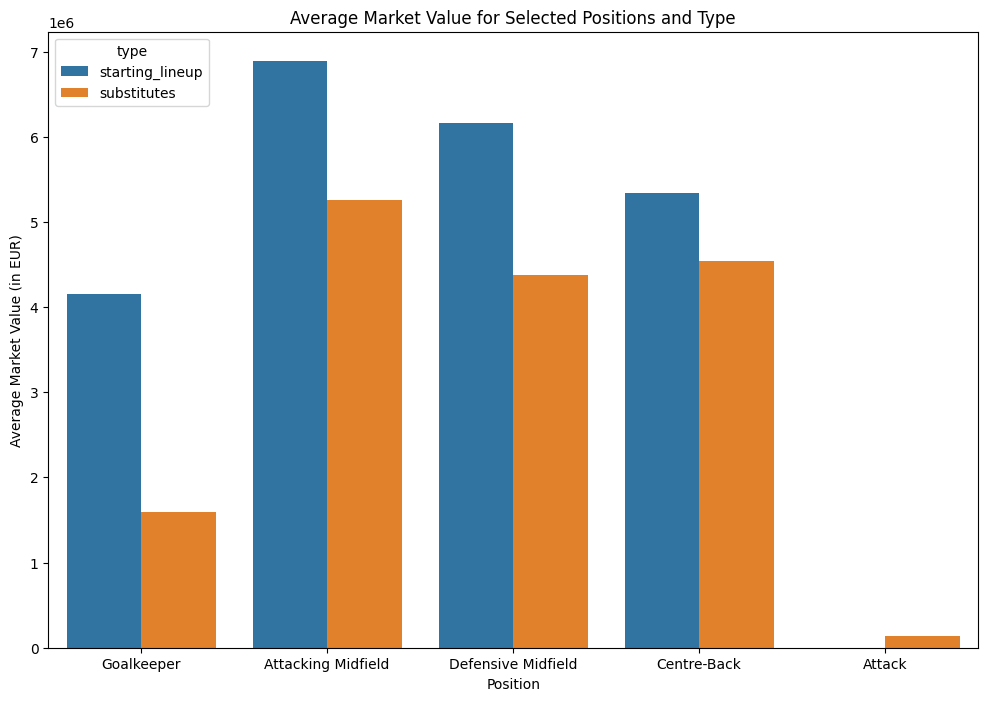

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame for specific positions
selected_positions = ['Goalkeeper', 'Attacking Midfield', 'Defensive Midfield', 'Centre-Back', 'Attack']
filtered_df = merged_df[merged_df['position'].isin(selected_positions)]

# Set up the plot
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x='position', y='market_value_in_eur', hue='type', data=filtered_df, ci=None)

# Set labels and title
plt.xlabel('Position')
plt.ylabel('Average Market Value (in EUR)')
plt.title('Average Market Value for Selected Positions and Type')

# Show the plot
plt.show()


## Insights
The bar plot visualizes the average market values (in EUR) for specific football positions, namely 'Goalkeeper,' 'Attacking Midfield' 'Defensive Midfield,','Centre-Back,' and 'Attack,' with a breakdown by type starting_lineup and subsitutes.As you can see from the plot that the attacking midfields has the highest market value especially if they are starting lineups and the goal keepers tends to have the lowest market value even if he is at the starting lineups so what we can understand from the plot that the starting linups is directly propotion to the market value and the subsitutes is inversly propotion meaning that if the market value decrease that means you are a subsitute and vise verse findings ranking based on market value and type starting linups 1- attacking midfield 2- defensive midfield 3-center back 4- goal keeper 5- attacking findings ranking based on market value and type subsitutes 1-attacking midfield 2-center back 3-defensive midfield 4- goal keeper 5- attack

## Research Question 4

<ipython-input-72-96027f1c5a7c>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='player_club_domestic_competition_id', y='market_value_in_eur', hue='type', data=merged_df, ci=None, palette='viridis')


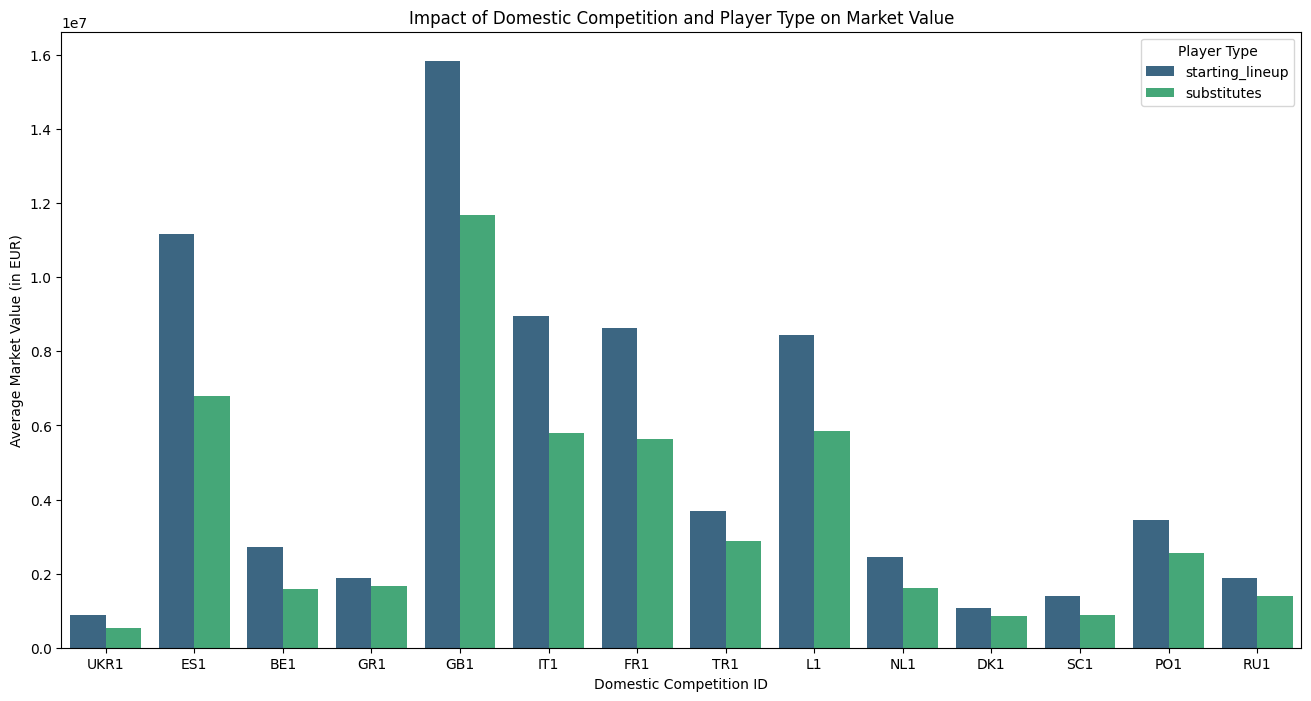

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(16, 8))

# Create a clustered bar plot
sns.barplot(x='player_club_domestic_competition_id', y='market_value_in_eur', hue='type', data=merged_df, ci=None, palette='viridis')

# Set labels and title
plt.xlabel('Domestic Competition ID')
plt.ylabel('Average Market Value (in EUR)')
plt.title('Impact of Domestic Competition and Player Type on Market Value')

# Show the legend
plt.legend(title='Player Type', loc='upper right')

# Show the plot
plt.show()


## Insights
The clustered bar plot provides a comprehensive overview of the relationship between a player's club's domestic competition, the player's type, and their average market value. based on the findings of the plot you can see that the domenstic competition has high influnce on the market value as there are some competitons increase the market value of player like GB1 and ES1 and on the other hand there are other competitions have make players to have less  market value of course the market value and type starting line ups are directly proportional and the market value and subsitutes type are inversely proportional and also as you can see that the higher the market value of the players in the domenstic competiton the higher the player type is subsitute and finally the domenstic competitons that have a high player market values has more number of players